In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Aiml project/MSFT.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1987-03-13,0.298177,0.300347,0.281250,0.287326,0.180600,105120000
1,1987-03-16,0.286458,0.286458,0.276910,0.285590,0.179509,88473600
2,1987-03-17,0.285590,0.296875,0.284722,0.295139,0.185511,54547200
3,1987-03-18,0.296875,0.313368,0.296875,0.310764,0.195332,119347200
4,1987-03-19,0.310764,0.316840,0.305556,0.316840,0.199151,62812800
...,...,...,...,...,...,...,...
8867,2022-05-18,263.000000,263.600006,252.770004,254.080002,254.080002,31356000
8868,2022-05-19,253.899994,257.670013,251.880005,253.139999,253.139999,32692300
8869,2022-05-20,257.239990,258.540009,246.440002,252.559998,252.559998,39169300
8870,2022-05-23,255.490005,261.500000,253.429993,260.649994,260.649994,33175400


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1987-03-13,0.287326
1,1987-03-16,0.285590
2,1987-03-17,0.295139
3,1987-03-18,0.310764
4,1987-03-19,0.316840
...,...,...
8867,2022-05-18,254.080002
8868,2022-05-19,253.139999
8869,2022-05-20,252.559998
8870,2022-05-23,260.649994


In [ ]:
df['Date']

0       1987-03-13
1       1987-03-16
2       1987-03-17
3       1987-03-18
4       1987-03-19
           ...    
8867    2022-05-18
8868    2022-05-19
8869    2022-05-20
8870    2022-05-23
8871    2022-05-24
Name: Date, Length: 8872, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
df

,Date,Close
0,1987-03-13,0.287326
1,1987-03-16,0.285590
2,1987-03-17,0.295139
3,1987-03-18,0.310764
4,1987-03-19,0.316840
...,...,...
8867,2022-05-18,254.080002
8868,2022-05-19,253.139999
8869,2022-05-20,252.559998
8870,2022-05-23,260.649994


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0      1987-03-13
1      1987-03-16
2      1987-03-17
3      1987-03-18
4      1987-03-19
          ...    
8867   2022-05-18
8868   2022-05-19
8869   2022-05-20
8870   2022-05-23
8871   2022-05-24
Name: Date, Length: 8872, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
1987-03-13,0.287326
1987-03-16,0.285590
1987-03-17,0.295139
1987-03-18,0.310764
1987-03-19,0.316840
...,...
2022-05-18,254.080002
2022-05-19,253.139999
2022-05-20,252.559998


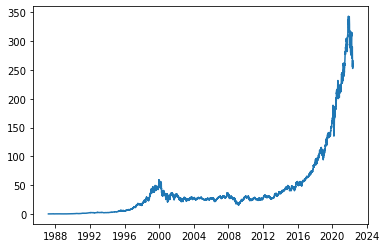

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

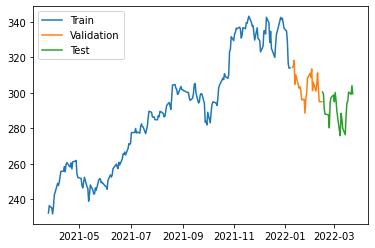

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 112ms/step - loss: 84717.0625 - mean_absolute_error: 289.3209 - val_loss: 92460.3594 - val_mean_absolute_error: 303.9858
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 84566.3594 - mean_absolute_error: 289.0609 - val_loss: 92324.0391 - val_mean_absolute_error: 303.7615
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 84416.9688 - mean_absolute_error: 288.8009 - val_loss: 92129.2500 - val_mean_absolute_error: 303.4407
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 84194.7344 - mean_absolute_error: 288.4156 - val_loss: 91813.8828 - val_mean_absolute_error: 302.9206
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 83860.4609 - mean_absolute_error: 287.8366 - val_loss: 91449.9297 - val_mean_absolute_error: 302.3193
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 83515.8203 - mean_absolute_error: 287.2395 - val_loss: 91056.9

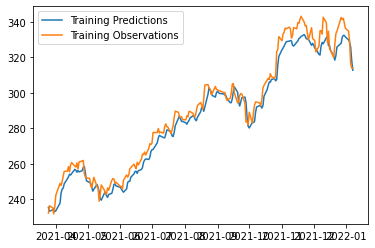

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

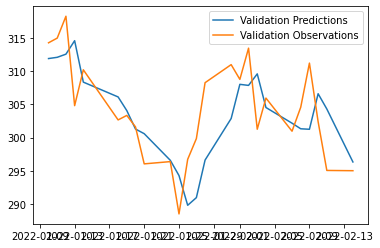

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

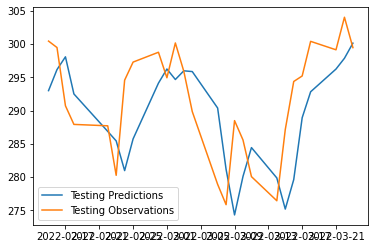

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

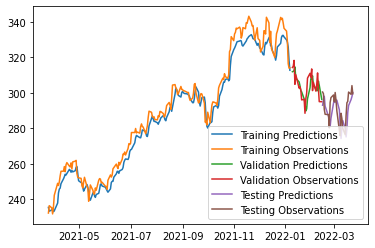

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])